In [26]:
import numpy as np
import pandas as pd
import os, sys
import xgboost
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Attribute Information:

Matrix column entries (attributes):
name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving parkinsons.data to parkinsons.data


In [4]:
df=pd.read_csv('parkinsons.data')
#Data description
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
# Get the features and labels -  Get the features and labels from the DataFrame (dataset). The features are all the columns except ‘status’, and the labels are those in the ‘status’ column.
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [8]:
#DataFlair - Get the count of each label (0 and 1) in labels  The ‘status’ column has values 0 and 1 as labels; let’s get the counts of these labels for both- 0 and 1.
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


Initialize a **MinMaxScaler** and scale the features to between -1 and 1 to normalize them. The MinMaxScaler transforms features by scaling them to a given range. The **fit_transform()** method fits to the data and then transforms it. We don’t need to scale the labels.

In [12]:
#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

Now, split the dataset into training and testing sets keeping 20% of the data for testing

In [13]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

Initialize an **XGBClassifier** and train the model. This classifies using eXtreme Gradient Boosting- using gradient boosting algorithms for modern data science problems. It falls under the category of Ensemble Learning in ML, where we train and predict using many models to produce one superior output.

In [14]:
#DataFlair - Train the model
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Finally, generate y_pred (predicted values for x_test) and calculate the accuracy for the model. Print it out.

In [15]:
# DataFlair - Calculate the accuracy - This gives us an accuracy of 94.87%, which is great considering the number of lines of code in this python project.
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


# How to understand those results?

The first obvious choice is to use the plot_importance() method in the Python XGBoost interface. It gives an attractively simple bar-chart representing the importance of each feature in our dataset: 

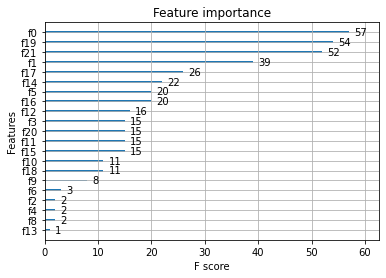

In [19]:
xgboost.plot_importance(model)

If we look at the feature importances returned by XGBoost we see that F0 dominates the other features, clearly standing out as the most important predictor of Alzheimer.  But being good data scientists…we take a look at the docs and see there are three options for measuring feature importance in XGBoost:

**Weight**. The number of times a feature is used to split the data across all trees.
**Cover**. The number of times a feature is used to split the data across all trees weighted by the number of training data points that go through those splits.
**Gain**. The average training loss reduction gained when using a feature for splitting.
These are typical importance measures that we might find in any tree-based modeling package. Weight was the default option so we decide to give the other two approaches a try to see if they make a difference:

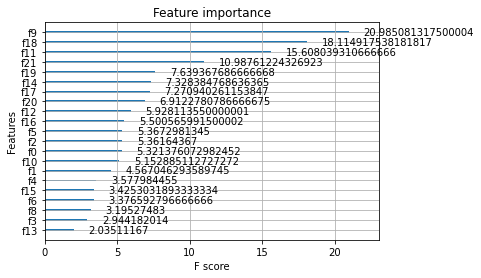

In [22]:
xgboost.plot_importance(model, importance_type="cover")

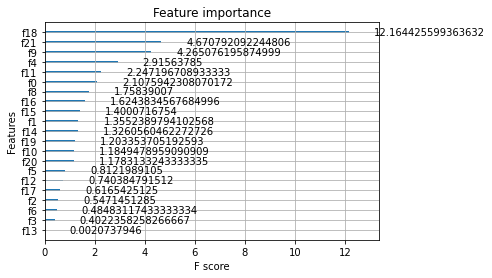

In [23]:
xgboost.plot_importance(model, importance_type="gain")